In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
df = pd.read_csv('D:\praktikum_datasets-main\praktikum_datasets-main\housing_LR.csv', index_col=0)
df.head()
housing = df[df['district']=="Чиланзарский"]
housing.head(10)

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
9,Чиланзарский,1,30.0,1,4,22200.0
11,Чиланзарский,3,67.0,2,5,30200.0
12,Чиланзарский,1,30.0,2,4,21200.0
13,Чиланзарский,1,30.0,2,4,21200.0
14,Чиланзарский,1,30.0,2,4,21200.0


In [7]:
housing.shape

(1616, 6)

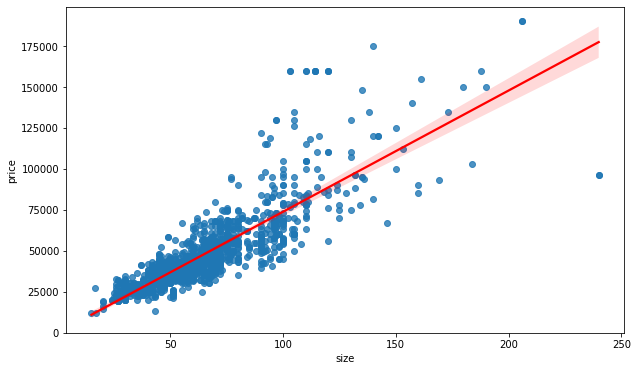

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [32]:
from sklearn import linear_model
lr_model = linear_model.BayesianRidge()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

lr_model.fit(x_train, y_train)

theta1 = lr_model.coef_[0]
theta0 = lr_model.intercept_
print(f'{theta1=}')
print(f'{theta0=}')

theta1=732.5770321130474
theta0=118.8023947132533


C:\Users\muhid\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'price')

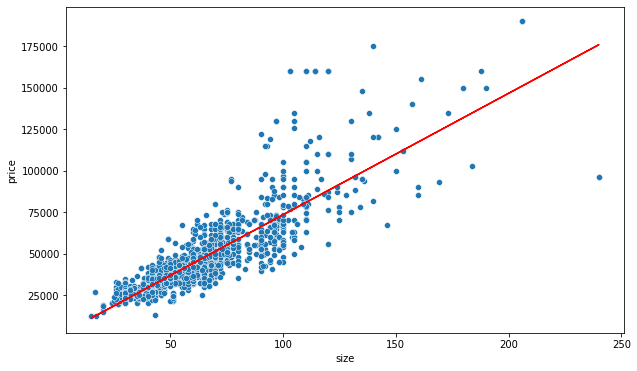

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel('size')
plt.ylabel('price')


In [34]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [35]:
y_predict = lr_model.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f'{MAE=}')
print(f'{RMSE=}')

MAE=7269.549793618248
RMSE=12735.56954060104
